## Principal Component Analysis 

#### Adam Glucksman
##### November 2022

### About

The following was created for Victoria University of Wellington, DATA201 in October 2022.  

For a full description of the assignment, please see `PCA_assignment.ipynb`

#### Description

The dataset we are going to use is a set of outline contours of leaves. The original images of the leaves, and information about the dataset is available at http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/ in case you are interested.

The dataset we will use (`SwedishLeaves.csv`). It consists of the outline contours of the leaves from the webpage above, using 200 points around the outline of each leaf. 

There are 440 contours, and 15 different leaf classes, with around 30 examples of each leaf.

The data matrix is arranged so that each row is a leaf, in order 
- x1, y1, x2, y2, x3, y3, ..., x200, y200, class




# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import random
%matplotlib inline

# Task 1

In [2]:
leaf_data = pd.read_csv('SwedishLeaves.csv', header=None)

In [3]:
leaf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.298901,-1.5,-0.151077,-1.467805,-0.037531,-1.365821,0.094352,-1.430738,0.255559,-1.442186,...,-1.402811,-0.663131,-1.463335,-0.549618,-1.500000,-0.418519,-1.498208,-0.298901,-1.5,10.0
1,-0.314211,-1.5,-0.218206,-1.433215,-0.139793,-1.353441,-0.075839,-1.253793,-0.023513,-1.142516,...,-1.127314,-0.320712,-1.227431,-0.374317,-1.333361,-0.383979,-1.436232,-0.314211,-1.5,10.0
2,-0.343490,-1.5,-0.238900,-1.446750,-0.147424,-1.360546,-0.061559,-1.258742,0.024574,-1.149368,...,-1.083749,-0.306309,-1.195531,-0.361686,-1.303204,-0.406440,-1.423495,-0.343490,-1.5,10.0
3,0.041703,-1.5,0.110975,-1.420355,0.135924,-1.309865,0.182896,-1.270870,0.238861,-1.177919,...,-1.114669,-0.111061,-1.233570,-0.083409,-1.345471,-0.037111,-1.431843,0.041703,-1.5,10.0
4,-0.452760,-1.5,-0.348141,-1.418461,-0.264912,-1.329461,-0.175809,-1.242895,-0.094373,-1.141614,...,-1.041837,-0.403325,-1.162075,-0.450946,-1.273163,-0.487379,-1.397046,-0.452760,-1.5,10.0


In [4]:
leaf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Columns: 401 entries, 0 to 400
dtypes: float64(401)
memory usage: 1.3 MB


In [5]:
leaf_data.shape

(440, 401)

In [6]:
#inspect last column of data
leaf_data[400].value_counts()

9.0     31
12.0    30
13.0    30
15.0    30
3.0     30
4.0     30
7.0     30
8.0     30
10.0    29
1.0     29
2.0     29
5.0     29
11.0    28
6.0     28
14.0    27
Name: 400, dtype: int64

The last column appears to have integer assignments for each of the leaf types. This will be handy for assigning names, but not for our plotting purposes. 

In [7]:
data = leaf_data.to_numpy()
data = data[:,0:-1] #start from 0 and end at the second-to-last
data = data.astype(float)

In [8]:
nleaves, npoints = np.shape(data)
print(nleaves,npoints)

440 400


### Test plot

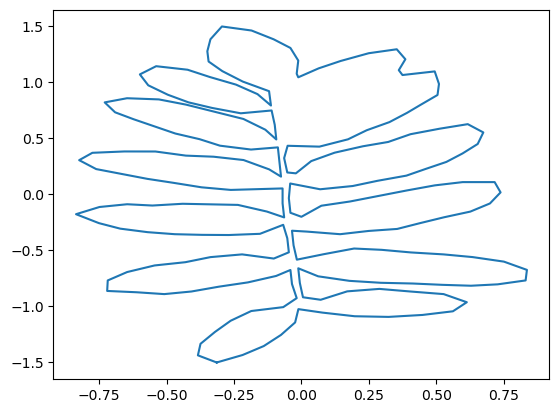

In [9]:
i=1
plt.plot(data[i,0::2],data[i,1::2]);

This is looking promising, but it's missing a name. 

## Assign leaf names

In [10]:
names = ['Ulmus Minor', 'Acer Platanoides', 'Ulmus Laevis', 'Quercus Robur', 
         'Betula Pubescens', 'Tilia Platyphyllos', 'Salix Fragilis', 'Populus Tremula', 
         'Ulmus Glabra', 'Sorbus Aucuparia', 'Prunus Padus', 'Tilia Cordata', 'Populus Sp.',
         'Scandosorbus Intermedia', 'Fagus Sylvatica']
just_names = names.copy()

In [11]:
#assign number values to leaf-names
values = leaf_data[400].values.tolist()
leaf_names = values.copy()
leaf_names = [int(values) for values in leaf_names] #change them all to int
leaf_names = [leaf_names - 1 for leaf_names in leaf_names] 
#subtract 1 from the indexes b/c the samples start at 1, but python lists start at 0

for i in range(len(leaf_names)):
    leaf_names[i] = names[leaf_names[i]]
#assigns the random order of leaves in the data to the order above

In [12]:
def leaf_row(name):
    return leaf_names.index(name)+1
#returns the row number that leaves occur

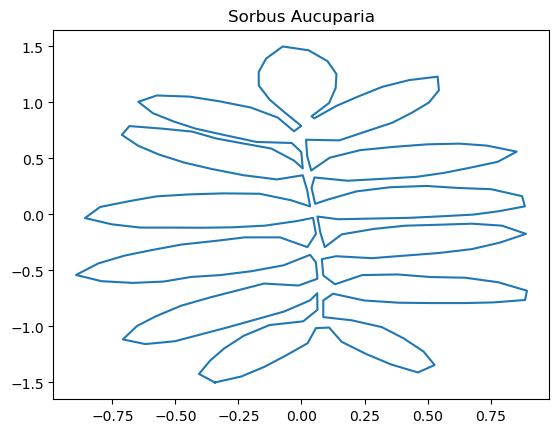

In [13]:
#test plot with leaf name
i=2
plt.plot(data[i,0::2],data[i,1::2]);
plt.title(leaf_names[i]);

Great! Feeling happy about this...

but there are about 30 samples in each class, so it would be fun to represent them arbitrarily, and easily.


In [14]:
#make a dictionary for number of each leaf-type
name_counts = []
for name in names:
    num = leaf_names.count(name)
    name_counts.append(num)

names = {names[i]:name_counts[i] for i in range(len(names))}

In [15]:
names

{'Ulmus Minor': 29,
 'Acer Platanoides': 29,
 'Ulmus Laevis': 30,
 'Quercus Robur': 30,
 'Betula Pubescens': 29,
 'Tilia Platyphyllos': 28,
 'Salix Fragilis': 30,
 'Populus Tremula': 30,
 'Ulmus Glabra': 31,
 'Sorbus Aucuparia': 29,
 'Prunus Padus': 28,
 'Tilia Cordata': 30,
 'Populus Sp.': 30,
 'Scandosorbus Intermedia': 27,
 'Fagus Sylvatica': 30}

This gives us a snapshot of how many of each leaf are in each class, handy!

## Leaf Generator

Use a leaf name to call a random leaf in that group

In [16]:
def random_leaf(name, data = data, ax = None, title = True, **kwargs):
    #index = leaf_names.index(name)
    index = leaf_row(name)
    rand = random.randint(0,names[name]-1)
    index = index + rand
    i=index
    
    #plotting functions
    if ax is None:
        ax = plt.gca();
        
    ax.plot(data[i,0::2],data[i,1::2],**kwargs);
    
    if title == True:
        plt.title(leaf_names[i]);

    return(ax);
    

<AxesSubplot:title={'center':'Ulmus Minor'}>

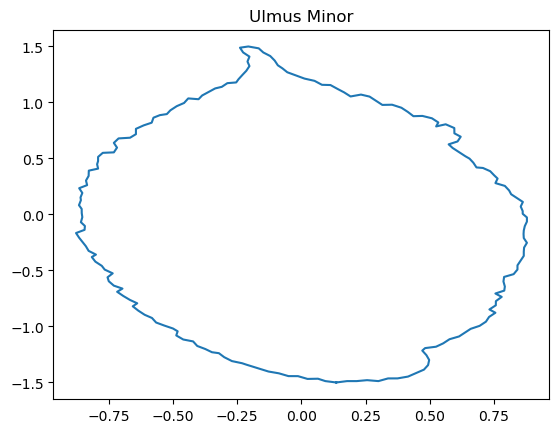

In [17]:
random_leaf('Ulmus Minor')

Cool! Now let's print em all in a grid, with names.

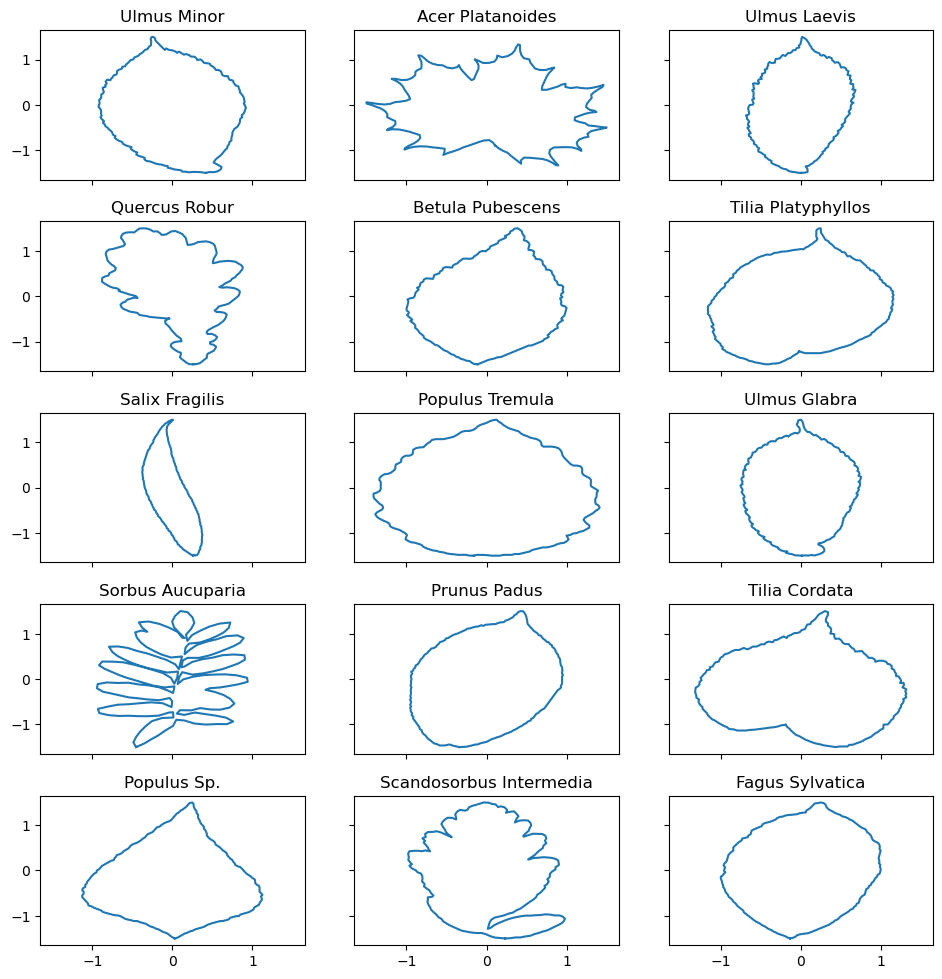

In [18]:
ls = []
fig, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(10,10))
fig.tight_layout(pad=2.0)

for i in range(5):
    for j in range(3):
        ls.append([i,j])

for i,name in enumerate(just_names):
    a = ls[i][0]
    b = ls[i][1]
    random_leaf(name, title = False, ax=axes[a,b])
    axes[a,b].set(title=name)


Okay, super happy with this. Plus it's nice to see them all 'potted'. 

# Task 2

In [19]:
meanleaf = np.mean(data,axis = 0)

In [20]:
#center data
c_data = data - meanleaf

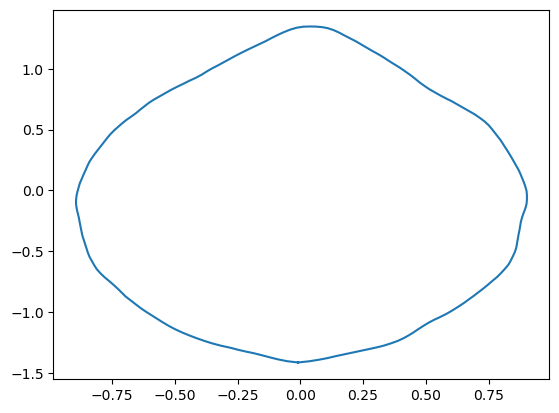

In [21]:
plt.plot(meanleaf[0::2],meanleaf[1::2]);

`meanleaf` looks like a drawing of a leaf that I would make on paper. It's got a very basic "leaf" shape.

## PCA function

In [22]:
def pca(data):
    #subtract off the mean
    mean = np.mean(data,axis = 0)
    newdata = data - mean
    
    # Compute the covariance matrix
    C = np.cov(newdata.T)

    # Get the eigenvalues and eigenvectors
    evals,evecs = np.linalg.eig(C)

    # Now need to sort them into descending order
    indices = np.argsort(evals)
    # make largest to smallest
    indices = indices[::-1]
    evecs = evecs[:,indices]
    evals = evals[indices]

    # Transform the data
    return np.dot(evecs.T,newdata.T).T, evals, evecs

### Testing out PCA and Plotting scree plots

In [23]:
newx, evals, evecs = pca(data)
cs = np.cumsum(evals) 
cs /= cs[-1]
max(cs[:1]) #this will give the total variance at the level entered

0.47945129087198146

the first PC accounts for 48% of the total variance. It's not massive, but significant nonetheless. We'll see below what that actually looks like in terms of leaf shape, but theoretically it should be about half-way towards looking like a leaf. 

let's look at the first 100 PC's:

0.9991250571954106

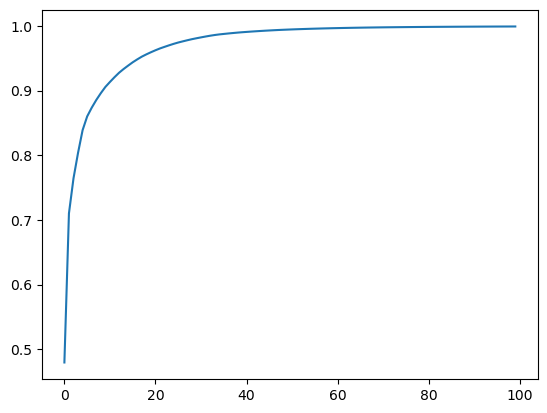

In [24]:
plt.plot(cs[:100]);
max(cs[:100])

Above we can see a few interesting things: first, total explained variance is calculated to 0.999 — which is *very* close to 1, meaning that within 100 PC's is just about all the variance you could want. 

On the plot itself, we can see towards the right side at 100 PCS (along the x axis) the plot is just about at the 1.0 mark. This is in line with the calculations above. 

To the left we can see a steep incline approaching very close to 1 by about 60. 

Let's zoom in on the plot and just show 18 PC's:

0.952465644578281

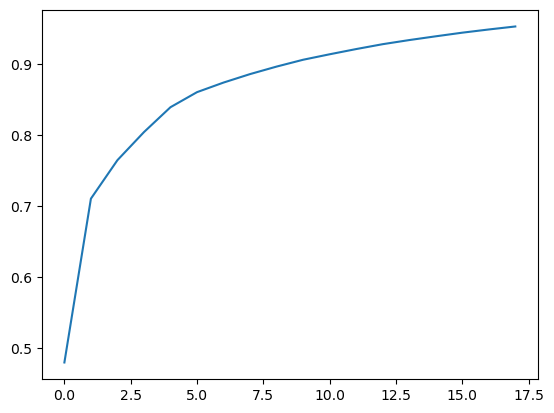

In [25]:
plt.plot(cs[:18]);
max(cs[:18])

The change between 1 and 2.5 is much more pronounced here. This is showing there's a big jump between 1 and about 7.5, until things start to smooth out. Let's compare the curves at the steepest parts and the flatter bits:

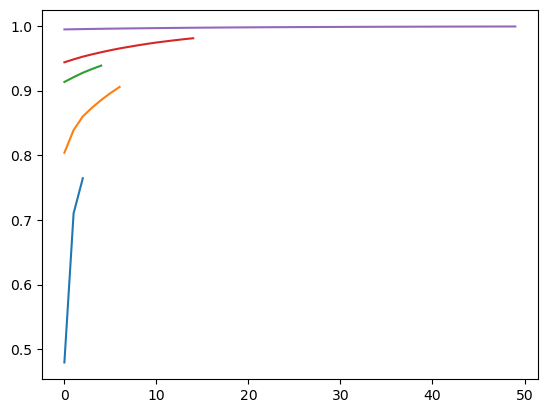

In [26]:
plt.plot(cs[:3]); #steepest
plt.plot(cs[3:10]); #next steepest
plt.plot(cs[10:15]); #flatter
plt.plot(cs[15:30]); #pretty flat
plt.plot(cs[50:100]); #flat

Neat! Here we can see how much variation is covered super quick, and how it progressively levels out. At the top we see the line from PC's 50 to 100, nearly a straight line. And in blue: PC's 1:3 — nearly 80% of variation. What's happening is at smaller number PC's there is a much higher change in explained variance. 1 to 2 PC's is about 70% of explained variance, while 50 to 100 PC's explain just under 0.01%, so there's a smaller and smaller rate of change.

In [27]:
for i in range(1,50,5):
    print(f"total % of variation at PC-{i}: {max(cs[:i]):.4%}")

total % of variation at PC-1: 47.9451%
total % of variation at PC-6: 86.0008%
total % of variation at PC-11: 91.3323%
total % of variation at PC-16: 94.3732%
total % of variation at PC-21: 96.2350%
total % of variation at PC-26: 97.4330%
total % of variation at PC-31: 98.2268%
total % of variation at PC-36: 98.7591%
total % of variation at PC-41: 99.0724%
total % of variation at PC-46: 99.2960%


Here we can see the jump numerically. 

Now, the question is: how many PC's to use. Could we get away with 10 or 15? Even at 30 it's looking promising. Let's explore visually, again: 

### Test how dim reduction looks

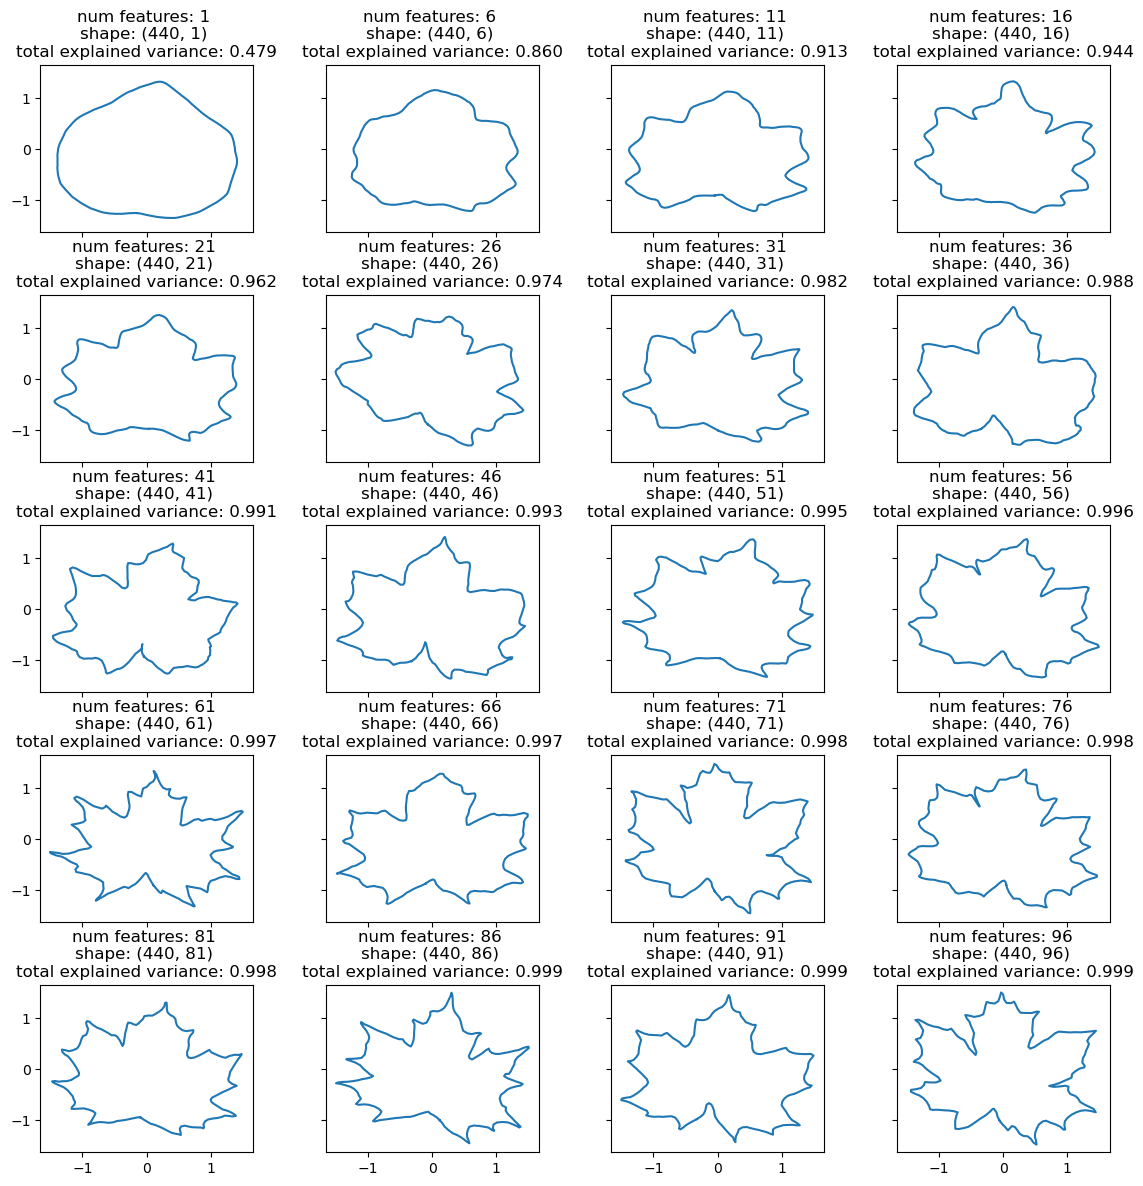

In [28]:
ls = []
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(12,12))
fig.tight_layout(pad=3.0, h_pad=3.5)

for i in range(5):
    for j in range(4):
        ls.append([i,j])

i = 0
for num in range(1,100,5):
    a = ls[i][0]
    b = ls[i][1]
    testleaf = np.dot(evecs[:,:num].T,c_data.T).T
    y=np.transpose(np.dot(evecs[:,:num],testleaf.T))+meanleaf
    random_leaf('Acer Platanoides', data = y, title=False, ax=axes[a,b])
    axes[a,b].set(title=f"num features: {num} \nshape: {np.shape(testleaf)} \ntotal explained variance: {max(cs[:num]):.3f}")
    i += 1


### Picking Principal Components

Well, as fun as it would be to reduce our model by 395 features, our leaves won't look much like leaves. At 1 PC our leaf merely resembles the meanleaf, which makes sense. At about 10 features, though, it looks like things take shape, so I'd say a happy place is about 15 to 20. That's about 95% total explained variance. And that feels right. The plots above show how the leaf shapes come together at 20 PCs, and it's quite a significant reduction from 400 to 20. It may also depend on what the purpose is, do we want identification/accuracy or  reduction/efficiency? 20 PC's seems to be a decent enough balance: a nice reduction, with with about 95% explained variance, and a dencent enough quality of shape ID.

Here are all 15 classes of leaves at 20 PC's: 

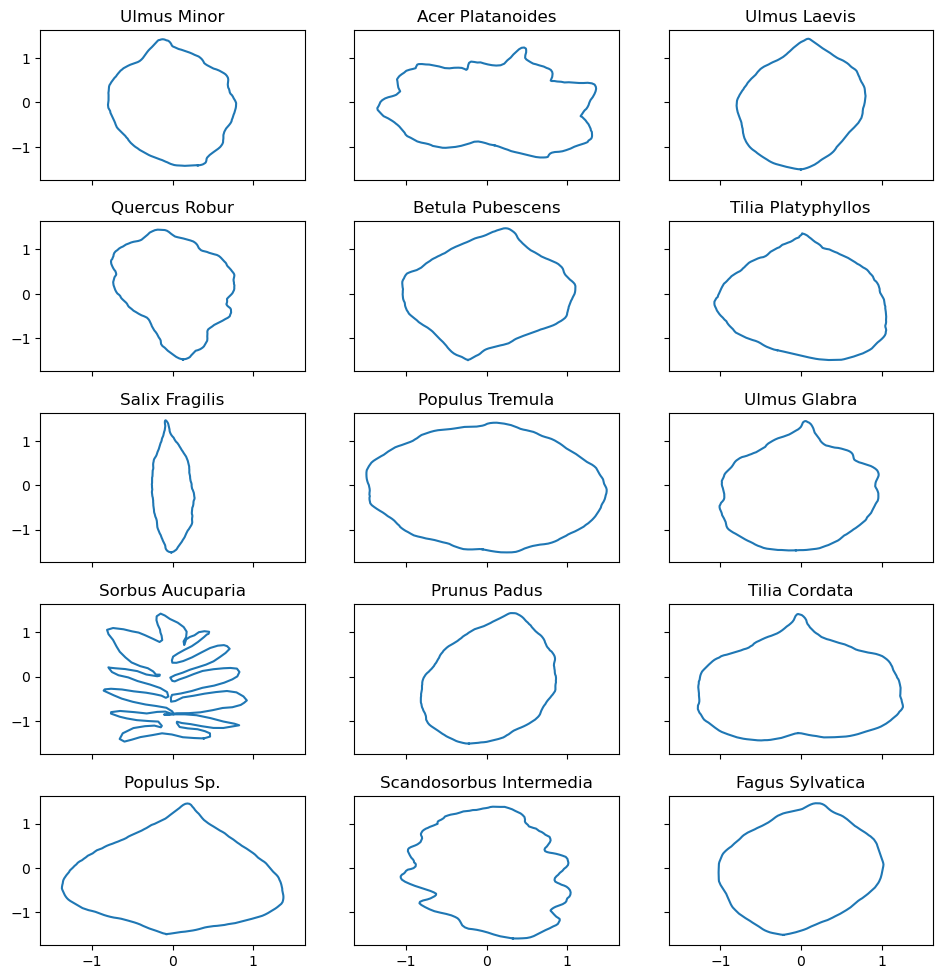

In [29]:
ls = []
fig, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(10,10))
fig.tight_layout(pad=2.0)

for i in range(5):
    for j in range(3):
        ls.append([i,j])

for i,name in enumerate(just_names):
    a = ls[i][0]
    b = ls[i][1]
    
    
    testleaf = np.dot(evecs[:,:20].T,c_data.T).T
    y=np.transpose(np.dot(evecs[:,:20],testleaf.T))+meanleaf
    
    
    random_leaf(name, data = y, title = False, ax=axes[a,b])
    axes[a,b].set(title=name)
    
    #random_leaf('Acer Platanoides', data = y, title=False, ax=axes[a,b])
    #axes[a,b].set(title=f"num features: {num} \nshape: {np.shape(testleaf)} \ntotal explained variance: {max(cs[:num]):.3f}")
    #i += 1

I think that the truth is that computers and human eyes see things so much differently. These models look okay, not super sharp, but they do start to show clear indications of what's what. I have a feeling that the computer starts to know the difference much quicker.

# Task 3

(440, 400)


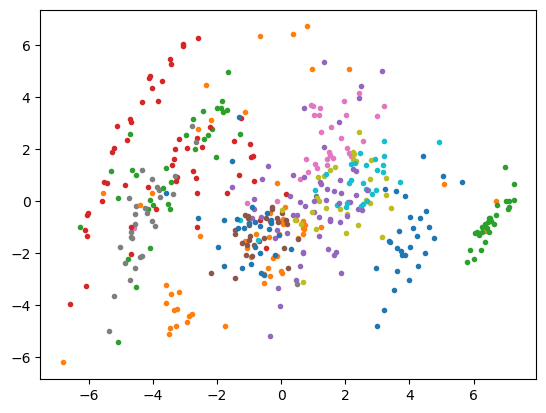

In [30]:
#without dimensionality reduction:
x, evals, evecs = pca(data)
print(np.shape(x))
inc = 0
for i in range(len(name_counts)):
    plt.plot(x[inc: inc + name_counts[i],0],
            x[inc: inc + name_counts[i],1], '.');
    inc = inc + name_counts[i]

Colourful! Here we can see how much can be discerned by eye, even with just two PC's. Each classification is represented by a different colour. These colours are generated automatically at random by matplotlib, and so there may be slight similarities that are hard to distinguish by eye. The grouping to the right can be fairly easily classified, though there are a few orange observations mixed in. Similarly to the left, the red group has a little bit of green, but mostly unified. As we move towards the center things start to get harder to break up. The green group, as well as red, orange, and dark blue are fairly well clustered together. 

The middle section represents those points in which the first two PC's are quite similar accross all leaves. This is understandable, given that the broad shape of a leaf is similar in a number of classes. 

(440, 10)


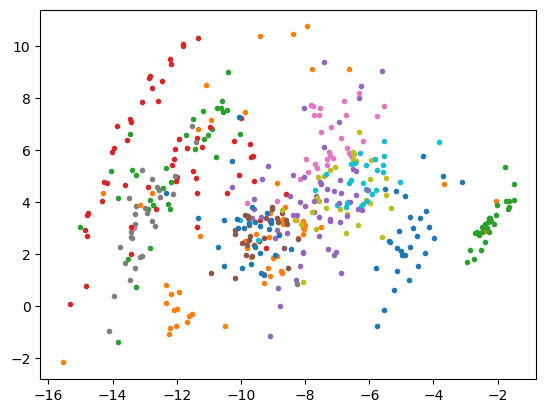

In [31]:
pc2 = np.dot(evecs[:,:10].T,data.T).T
print(np.shape(pc2))
#y=np.transpose(np.dot(evecs[:,:2],pc2.T))+meanleaf
inc = 0
for i in range(len(name_counts)):
    plt.plot(pc2[inc: inc + name_counts[i],0],
            pc2[inc: inc + name_counts[i],1], '.');
    inc = inc + name_counts[i]

This second graph is included aslo because here I am using a slightly different approach to plot the components, but with a very similar result (the points are similarly spaced, but the scale of the graph here is -16 to -2 along the x, and -2 to 10 along the y, while above the x axis is -6 to 6 as well as y-axis).

The technique of reducing the data to any number of PC's won't change the outcome of this plot because here the components can only be represented by 2 dimensions. So increasing the number of PC's between 2 and the upper limit would show the same results. 

But if we *reduce* the amount of PC's to 1, we get a different outcome:

(440, 1)


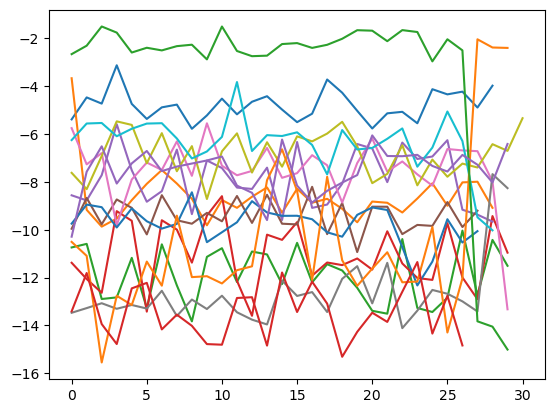

In [32]:
pc2 = np.dot(evecs[:,:1].T,data.T).T
print(np.shape(pc2))
#y=np.transpose(np.dot(evecs[:,:2],pc2.T))+meanleaf
inc = 0
for i in range(len(name_counts)):
    plt.plot(pc2[inc: inc + name_counts[i],0])
            #pc2[inc: inc + name_counts[i],1], '.');
    inc = inc + name_counts[i]

At one PC we see a different, but again similar story. The green class, the red, and the dark blue are already starting to distinguish themselves. In a machine learning environment, those classes would likely have the highest rate of classification. Seems that the green class of leaf (aside from the bit that drops way down) is likely to be a highly unique pattern. 

# Task 4

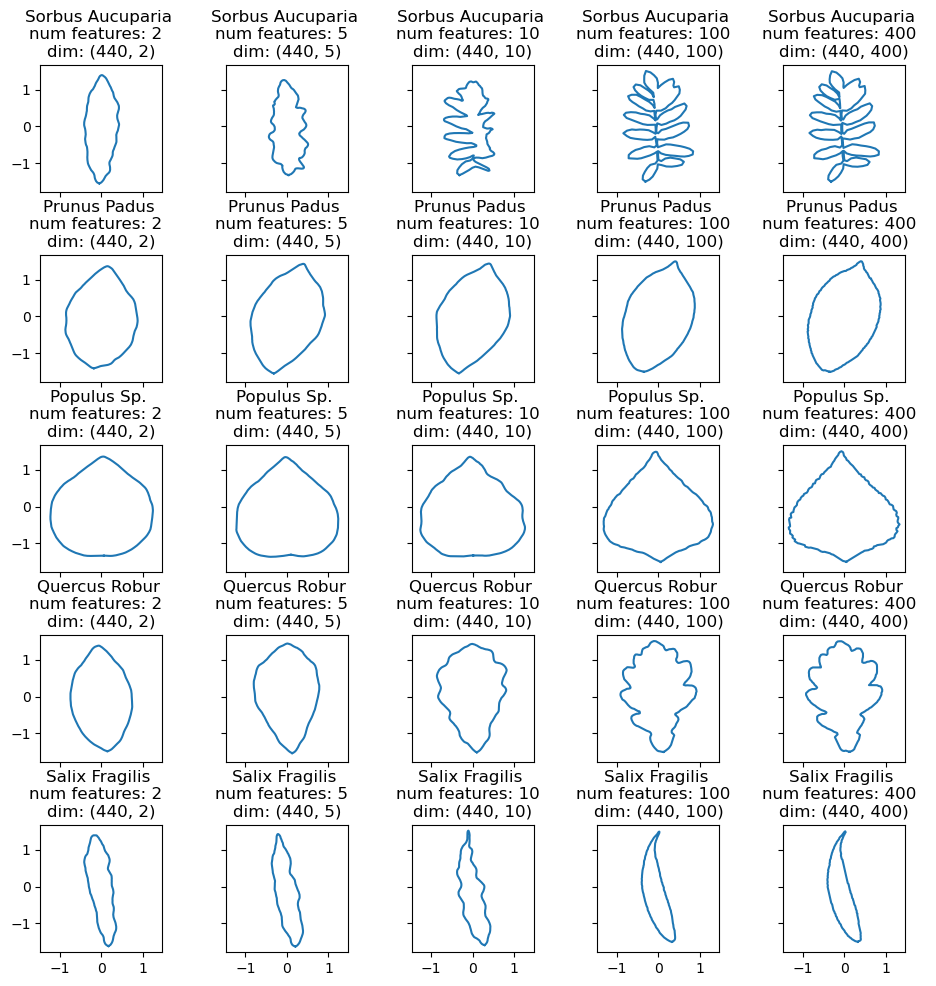

In [33]:
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10,10))
fig.tight_layout(pad=3.0, h_pad=3.5)

dim = [2,5,10,100,400]

compare = ['Sorbus Aucuparia', 'Prunus Padus', 'Populus Sp.',
           'Quercus Robur','Salix Fragilis']


for i in range(5):
    for j in range(5):
        t_data = np.dot(evecs[:,:dim[j]].T,c_data.T).T
        y=np.transpose(np.dot(evecs[:,:dim[j]],t_data.T))+meanleaf
        axs[i, j].plot(y[leaf_row(compare[i]),0::2],
                       y[leaf_row(compare[i]),1::2]);
        
        axs[i,j].set(title = f"{compare[i]} \nnum features: {dim[j]}  \ndim: {np.shape(t_data)}")

Do these plots lead me to change my mind on how many PC's to use? 

The simple answer is no, but maybe that is because I cheated a little bit by plotting a leaf in various stages in section 2. Here, above, we can see that the leaves look pretty nice even at 10 PC's, and nearly perfect at 100. 

But this question may have different answers to suit different purposes. In most ML environments, 5-10 PC's would not only suffice the classification methods, but would significantly improve performance in the model. That's a major plus. 

But there may be other reasons to reduce dimensionality but keep distinguishability. In a situation where identification of plants could put people at health risk (mushroom foragers, medicinal purposes, etc) a higher number of PCs might slow things down, but I'm sure someone waiting to know if a plant is poisonous *before* they eat it may be okay to wait another minute. There could be a reason to want high accuracy at the cost of a slightly slower system (and yes, I would agree that a person identifying a plant *after* eating would want it done **quick**. Takeaway lesson: don't eat sketchy plants)





# Task 5

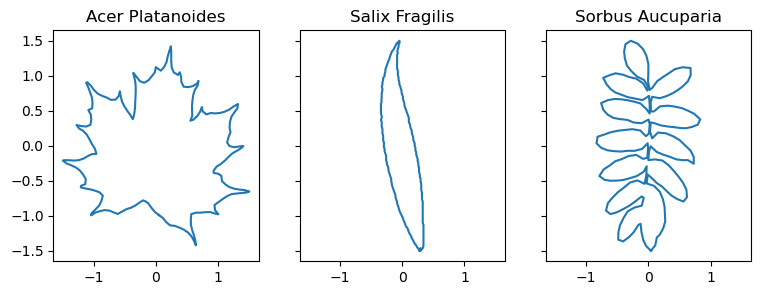

In [34]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(9,3))

classes = [2,7,10]
starts = []
ends = []
l_type = []

for i, num in enumerate(classes):
    name = just_names[num-1]
    l_type.append(name)
    random_leaf(name, ax=axs[i])
    axs[i].set(title=just_names[num-1])
    start = leaf_row(name)
    starts.append(start)
    end = start + names[name]
    ends.append(end)

#print(starts)
#print(ends)

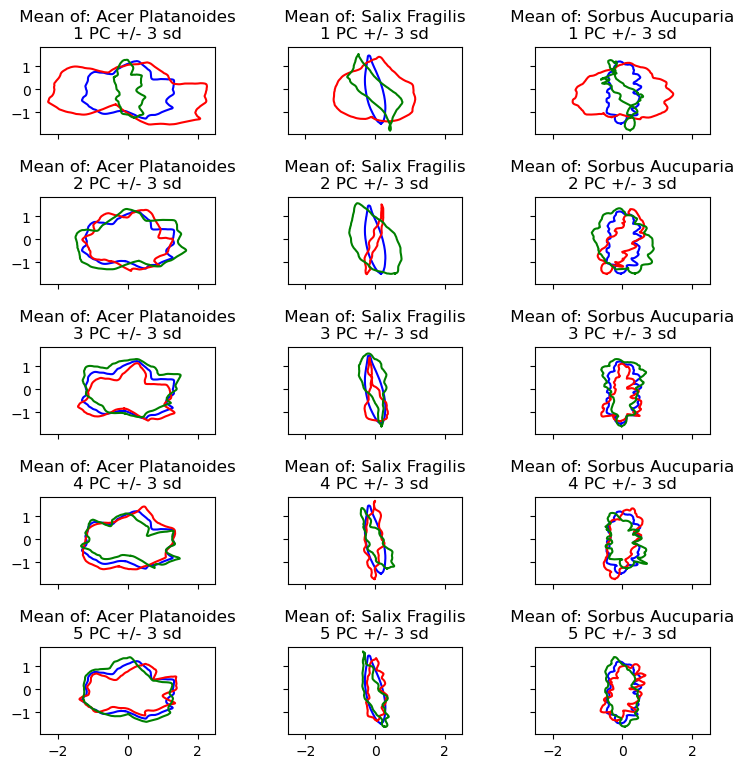

In [35]:
fig, axs = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(8,8))
fig.tight_layout(pad=3.0, h_pad=3.5)

sd = 3
for i in range(5):
    for j in range(1,4):
        plt.subplot(5,3,i*3+j);
        meanleaf = np.mean(data[starts[j-1]:ends[j-1],],axis=0)
        plt.plot(meanleaf[0::2],meanleaf[1::2],'b') #plots the mean
        plt.plot(meanleaf[0::2] - np.sqrt(evals[i])*sd*evecs[0::2,i], 
                 (meanleaf[1::2] - np.sqrt(evals[i])*sd*evecs[1::2,i]),'r')
        plt.plot(meanleaf[0::2] + np.sqrt(evals[i])*sd*evecs[0::2,i], 
                 (meanleaf[1::2] + np.sqrt(evals[i])*sd*evecs[1::2,i]),'g')
        
        axs[i,j-1].set(title = f" Mean of: {l_type[j-1]} \n{i+1} PC +/- 3 sd")
        
        

Above we can see a few things, first is a series of plots for each of the first five PC's for three classes. For each plot there is a blue shape represented by the the mean of the leaves of that class, then in red is the plot minus 3 standard deviations, and in green we're adding 3 sds. 

At 1 PC there is the clearest disparity between the three colours. Subtracting 3 sds looks like it stretches the leaves, while adding 3 sds (in green) has the effect of folding the leaves inside out. As we increase the PCs the degree of change seems to start to level out. The expectation here is that as we increase further the number of PCs, the differences in the leaves will become less and less noticable. 

What is happening here? Well, it's likely that as we increase PC's, the total variation becomes more and more explained, thus the mean encompasses more and more and slowly trends towards a general representation of each class. So when the mean is less "inclusive" of the variety, there is more variation, and thus a step in either direction gives us a very different shape. As the mean becomes more "inclusive", there is more data represented by that mean, and less deviations away from it. 

# Task 6

## Prepare Data

In [95]:
import time

#ML Packages

from sklearn.decomposition import PCA
from sklearn import decomposition

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict


#classifiers
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

## metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.metrics import precision_recall_curve




## Prepare train and test datasets

In [84]:
#split data into training and test sets
train_set, test_set = train_test_split(leaf_data, test_size=0.25)

#create a copy of the training set 
leaf_training = train_set.copy()

In [85]:
leaf_training.shape

(330, 401)

In [86]:
X_train = train_set.drop(400, axis=1)
y_train = train_set[400].copy()

#separating predictors and labels

X_test = test_set.drop(400, axis=1)
y_test = test_set[400].copy()

print(X_train.shape)
print(X_test.shape)

(330, 400)
(110, 400)


## Establish ML pipeline

In [114]:
def pca_svc(x, y, n=5):
    #fit model
    t = time.time()
    pca_ = make_pipeline(PCA(n_components=n, random_state=0))
    pca_.fit(x,y);
    svc = SVC()
    X_transformed = pca_.transform(x)
    print(f"shape of transformed data: {np.shape(X_transformed)} \n")
    svc_clf = svc.fit(X_transformed,y)
    
    #show num of classes
    print(f"classes: {svc_clf.classes_} \n")
    
    #metrics
    predict_ = svc_clf.predict(X_transformed)
    print(f"Accuracy score: {accuracy_score(y, predict_):.2%}\n")
    
    conf_mx = confusion_matrix(y, predict_)
    print(conf_mx)
    
    #plt.matshow(conf_mx, cmap=plt.cm.gray);
    plt.matshow(conf_mx, cmap='hot');
    plt.show();
    
    print(f"runtime: {time.time()-t}")
    
    #return predict_; conf_mx;
    

### Applying the model training set

shape of transformed data: (330, 5) 

classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] 

Accuracy score: 76.36%

[[21  0  0  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 1 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  6  0  0  0  0  0  1]
 [ 0  0  0 21  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  3  1  0  0  0  0  1  0  0  0 14]
 [ 0  0  0  0  0 18  0  1  0  0  0  2  0  0  1]
 [ 0  0  0  0  0  1 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 24  0  0  0  0  0  0  0]
 [ 1  0  6  0  1  0  0  1 13  0  1  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 21  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0 16  3  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  8 14  0  0]
 [ 3  0  3  0  0  0  0  0  4  0  1  1  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0 18]]


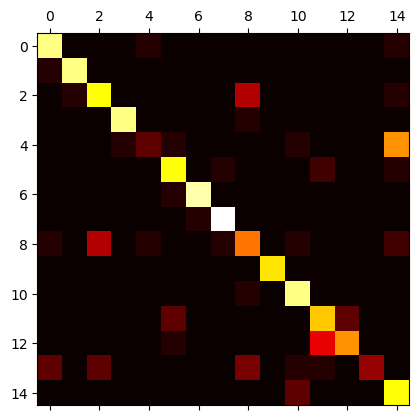

runtime: 0.6103730201721191


In [115]:
pca_svc(X_train, y_train)

This heatmap of the confusion matrix is helpful to see where the model is making reliable accurate predictions, as well as where there is noise. The goal is to get a while stip down the middle and black everywhere else. Here we can see a decent job in the middle but mediocre results to either side. There seems to be a bit of noise, but a decent work of it overall.

The white square is 100% accuracy, here's a plot of that square — class 7, and the leaf that represents:

<AxesSubplot:title={'center':'Populus Tremula'}>

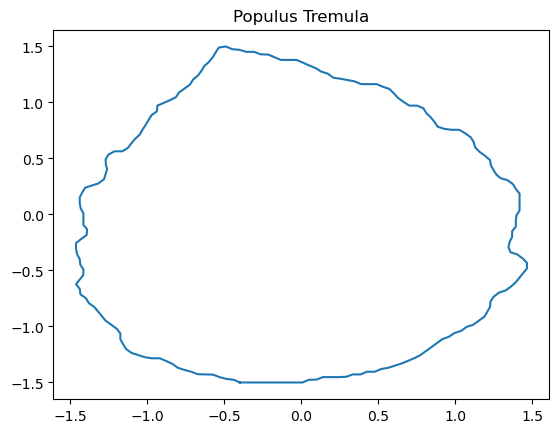

In [93]:
random_leaf(just_names[7])

Surprising! not my first choice for 100% accuracy. This could be indicitive of a number of things going on, interesting.

### Applying the test set

shape of transformed data: (110, 5) 

classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] 

Accuracy score: 78.18%

[[ 5  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  1  0  0  0  0  1  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  4  0  0  0  1]
 [ 0  1  0  0  1  0  0  0  0  0  0  4  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  5  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  0  0  0  7  0]
 [ 0  0  0  0  6  0  0  0  1  0  0  0  0  0  2]]


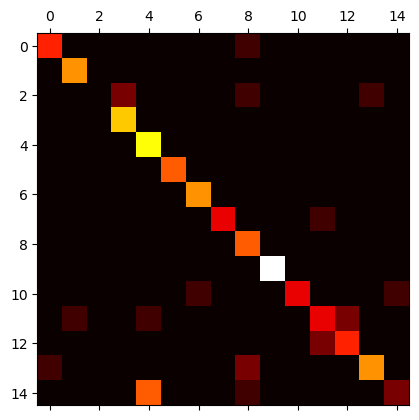

runtime: 0.3111002445220947


In [116]:
pca_svc(X_test, y_test)

Similar results in our heatmap. Seems like a little bit more noise. This is a particularly small dataset. And yet still, not bad at 5 PC's! This model isn't quite ready for launch yet, but it's very promising. A slightly higher score means the model isn't overfitting, and without any tuning, there's a lot of potential here.

Here's a plot of a perfect prediction at class 9, and a reasonably good one at square 3:

<AxesSubplot:title={'center':'Sorbus Aucuparia'}>

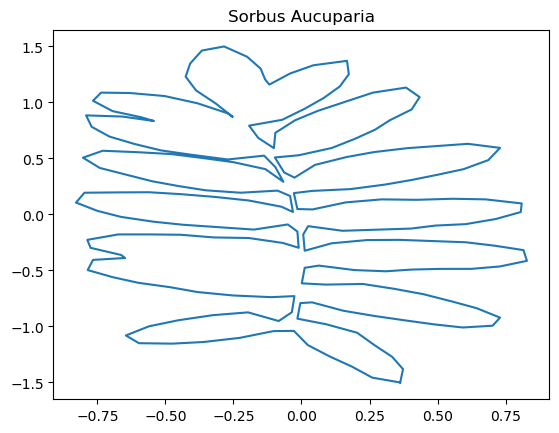

In [94]:
random_leaf(just_names[9])

This isn't too surprising given that the shape is quite distinct. 

<AxesSubplot:title={'center':'Quercus Robur'}>

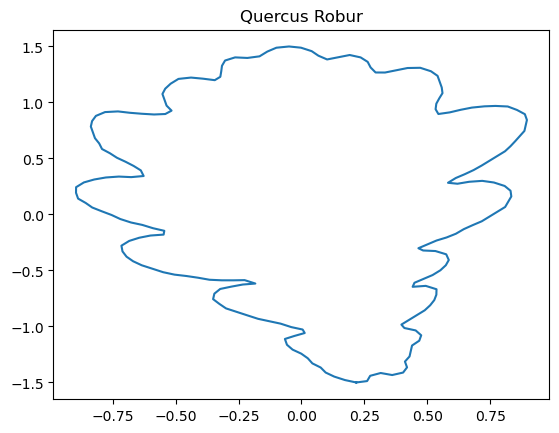

In [92]:
random_leaf(just_names[3])

This is less surprising, but still interesting. At lower dimensions these leaves still stick out well enough for our ML model to distinguish. Good work! 

Finally, let's do just one more test on the test set but with a higher number of PCs (we could sit here and experiment all day). Specifically, let's just look at the runtime: 

shape of transformed data: (110, 100) 

classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] 

Accuracy score: 87.27%

[[ 5  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  2]
 [ 0  0  0  0  0  1  0  0  0  0  0  5  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  6]]


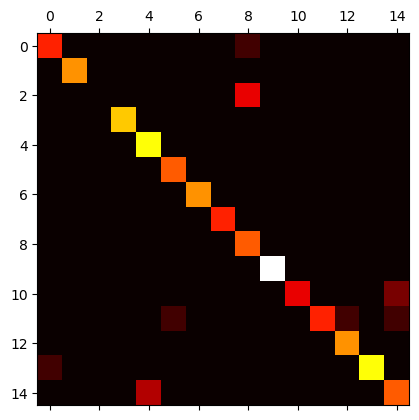

runtime: 0.29999589920043945


In [117]:
pca_svc(X_test, y_test, n=100);


Okay, well that went a lot better than expected:

- Runtime for 5PC: 0.3018319606781006 
- Runtime for 100PC: 0.35892701148986816
- good accuracy, which is to be expected for a higher number of PCs


Not too bad!

### End of Assignment 4 Data201 

October 2022\
Adam Glucksman 